##Loading the combined dataset



In [3]:
import pandas as pd
df = pd.read_excel("/content/bank-full (1).xlsx")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,...,1,-1,0,unknown,NaN,NaN,NaN,NaN,NaN,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,...,1,-1,0,unknown,NaN,NaN,NaN,NaN,NaN,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,...,1,-1,0,unknown,NaN,NaN,NaN,NaN,NaN,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,...,1,-1,0,unknown,NaN,NaN,NaN,NaN,NaN,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,...,1,-1,0,unknown,NaN,NaN,NaN,NaN,NaN,no


##Data description

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,86399.000000,45211.000000,45211.000000,86399.000000,86399.000000,86399.000000,86399.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.501372,1362.272058,15.806419,258.198058,2.670286,20.681061,0.386127,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.534861,3044.765829,8.322476,258.341171,2.947825,75.269141,1.713060,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,-8019.000000,1.000000,-1.000000,1.000000,-1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


##Data information
overlapping columns after combining are having lots of null values that shall be removed to get better results

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86399 entries, 0 to 86398
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             86399 non-null  int64  
 1   job             86399 non-null  object 
 2   marital         86399 non-null  object 
 3   education       86399 non-null  object 
 4   default         86399 non-null  object 
 5   balance         45211 non-null  float64
 6   housing         86399 non-null  object 
 7   loan            86399 non-null  object 
 8   contact         86399 non-null  object 
 9   day             45211 non-null  float64
 10  month           86399 non-null  object 
 11  day_of_week     41188 non-null  object 
 12  duration        86399 non-null  int64  
 13  campaign        86399 non-null  int64  
 14  pdays           86399 non-null  int64  
 15  previous        86399 non-null  int64  
 16  poutcome        86399 non-null  object 
 17  emp.var.rate    41188 non-null 

##Calculating null values in the dataset

In [25]:
nan_values = df.isna().sum()
print("NaN values in each column:")
print(nan_values)

NaN values in each column:
age                   0
job                   0
marital               0
education             0
default               0
balance           41188
housing               0
loan                  0
contact               0
day               41188
month                 0
day_of_week       45211
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate      45211
cons.price.idx    45211
cons.conf.idx     45211
euribor3m         45211
nr.employed       45211
y                     0
dtype: int64


##Average age of people who said "yes" and "no" to term deposit

In [7]:
average_age_by_response = df.groupby('y')['age'].mean()
print(average_age_by_response)

y
no     40.395554
yes    41.316346
Name: age, dtype: float64


##Average time spent to convince the customer
Clearly, the time spent on the customers who said yes is double the time spent with those who said no , which means the dusration matters a lot.

In [8]:
average_duration_by_response = df.groupby('y')['duration'].mean()
print(average_duration_by_response)

y
no     221.008186
yes    544.622621
Name: duration, dtype: float64


##Checking outliers by plotting different features
1) plotted age against duration ( found 2 outliers)

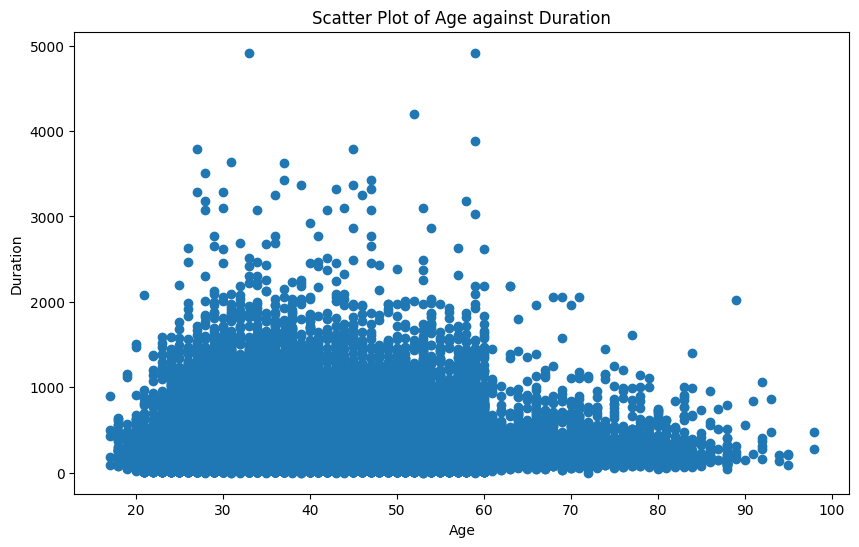

In [12]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['duration'])
plt.title('Scatter Plot of Age against Duration')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

2) plotted age against number of days that passed by after the client was last contacted from a previous campaign (no outlier as such)

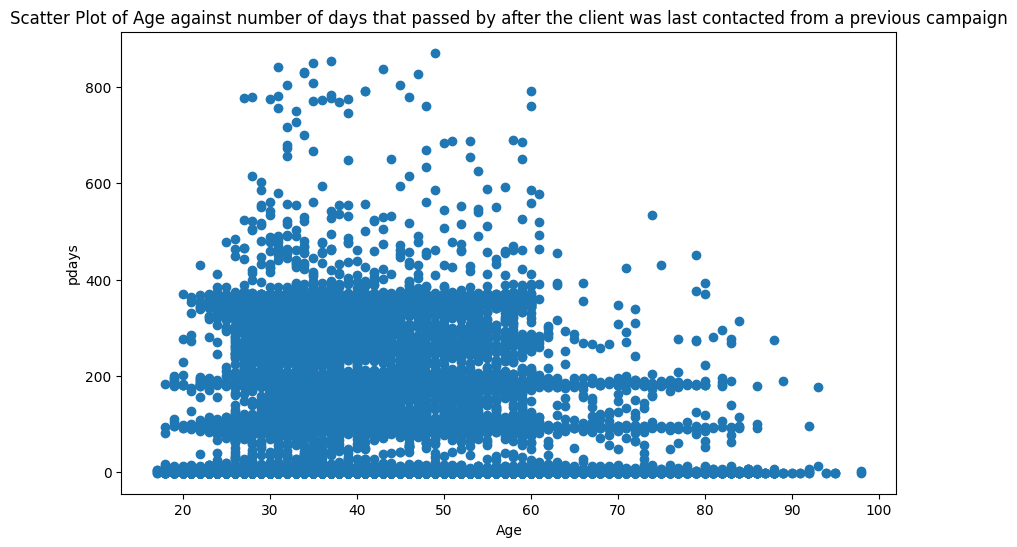

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['pdays'])
plt.title('Scatter Plot of Age against number of days that passed by after the client was last contacted from a previous campaign')
plt.xlabel('Age')
plt.ylabel('pdays')
plt.show()

3) plotted age against number of contacts performed before this campaign ( 1 outlier found)

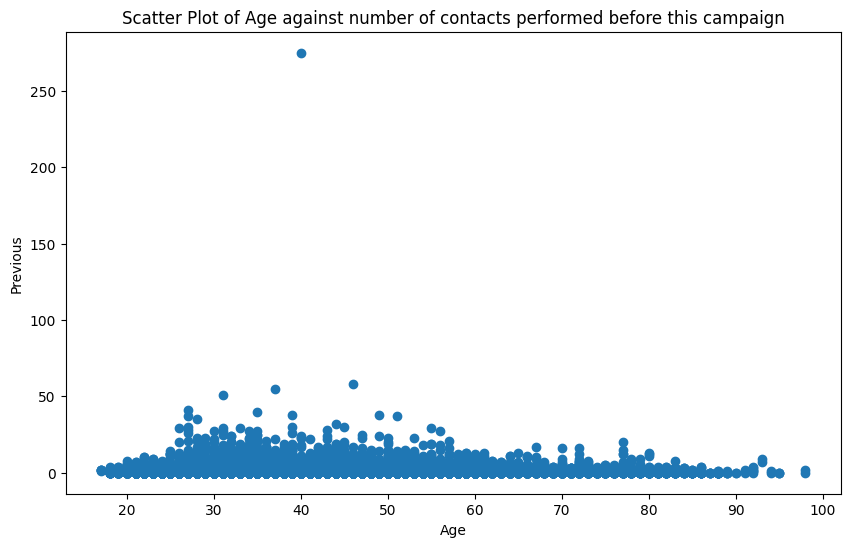

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['previous'])
plt.title('Scatter Plot of Age against number of contacts performed before this campaign')
plt.xlabel('Age')
plt.ylabel('Previous')
plt.show()

##Analyzed the conversion rate by comparing the status of outcome from previous campaign and current status.

In [20]:
count_failure_yes = df[(df['poutcome'] == 'failure') & (df['y'] == 'yes')].shape[0]
count_unknown_yes = df[(df['poutcome'] == 'unknown') & (df['y'] == 'yes')].shape[0]
count_success_yes = df[(df['poutcome'] == 'success') & (df['y'] == 'yes')].shape[0]
print(f"Number of rows where poutcome is 'failure' and y is 'yes': {count_failure_yes}")
print(f"Number of rows where poutcome is 'unknown' and y is 'yes': {count_unknown_yes}")
print(f"Number of rows where poutcome is 'sucess' and y is 'yes': {count_success_yes}")

Number of rows where poutcome is 'failure' and y is 'yes': 1223
Number of rows where poutcome is 'unknown' and y is 'yes': 3386
Number of rows where poutcome is 'sucess' and y is 'yes': 1872


In [21]:
count_failure_no = df[(df['poutcome'] == 'failure') & (df['y'] == 'no')].shape[0]
count_unknown_no = df[(df['poutcome'] == 'unknown') & (df['y'] == 'no')].shape[0]
count_success_no = df[(df['poutcome'] == 'success') & (df['y'] == 'no')].shape[0]
print(f"Number of rows where poutcome is 'failure' and y is 'no': {count_failure_no}")
print(f"Number of rows where poutcome is 'unknown' and y is 'no': {count_unknown_no}")
print(f"Number of rows where poutcome is 'sucess' and y is 'no': {count_success_no}")

Number of rows where poutcome is 'failure' and y is 'no': 7930
Number of rows where poutcome is 'unknown' and y is 'no': 33573
Number of rows where poutcome is 'sucess' and y is 'no': 1012


#Plotted a graph to get a better idea of the previous outcomes

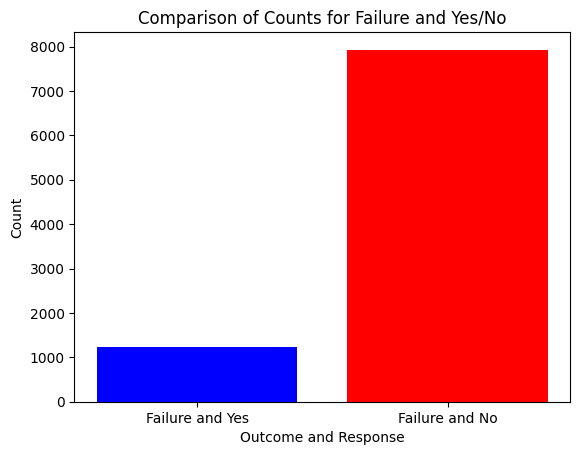

In [22]:
labels = ['Failure and Yes', 'Failure and No']
counts = [count_failure_yes, count_failure_no]

plt.bar(labels, counts, color=['blue', 'red'])
plt.title('Comparison of Counts for Failure and Yes/No')
plt.xlabel('Outcome and Response')
plt.ylabel('Count')
plt.show()

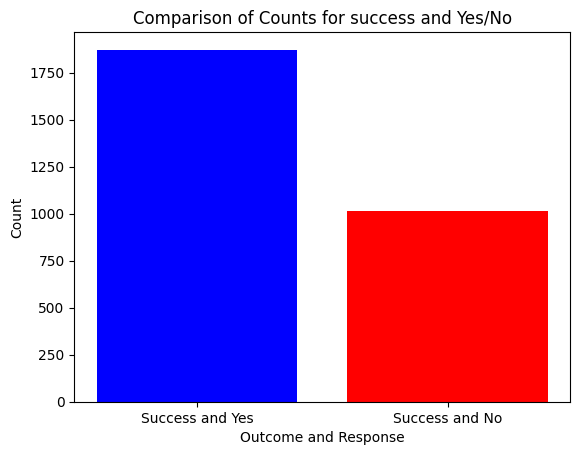

In [23]:
labels = ['Success and Yes', 'Success and No']
counts = [count_success_yes, count_success_no]

plt.bar(labels, counts, color=['blue', 'red'])
plt.title('Comparison of Counts for success and Yes/No')
plt.xlabel('Outcome and Response')
plt.ylabel('Count')
plt.show()

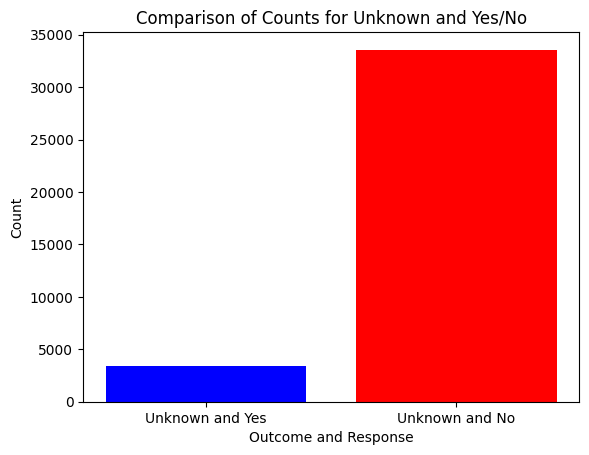

In [24]:
labels = ['Unknown and Yes', 'Unknown and No']
counts = [count_unknown_yes, count_unknown_no]

plt.bar(labels, counts, color=['blue', 'red'])
plt.title('Comparison of Counts for Unknown and Yes/No')
plt.xlabel('Outcome and Response')
plt.ylabel('Count')
plt.show()